In [3]:
import pandas as pd  # Para manipulación de datos
import numpy as np  # Para cálculos numéricos
import matplotlib.pyplot as plt  # Para gráficos
import seaborn as sns  # Para visualización avanzada

# Configuración de gráficos en Seaborn
sns.set(style="whitegrid")


In [4]:
df = pd.read_csv("data.csv")  # Cargar el archivo CSV
df.head()  # Mostrar las primeras 5 filas


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()  # Información general del dataset
df.describe()  # Estadísticas generales de las columnas numéricas
df.isnull().sum()  # Verificar valores nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df = df.dropna()  # Eliminar filas con valores nulos
df = df.drop_duplicates()  # Eliminar duplicados


Análisis Exploratorio de Datos (EDA)

📌 Distribución de ventas por país:

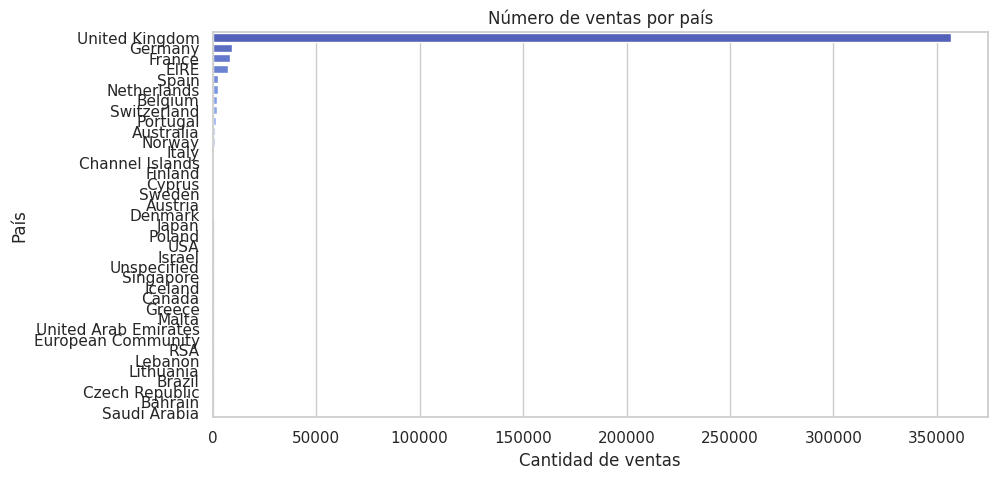

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df["Country"], order=df["Country"].value_counts().index, palette="coolwarm")
plt.title("Número de ventas por país")
plt.xlabel("Cantidad de ventas")
plt.ylabel("País")
plt.show()


📌 Ingresos totales por país:

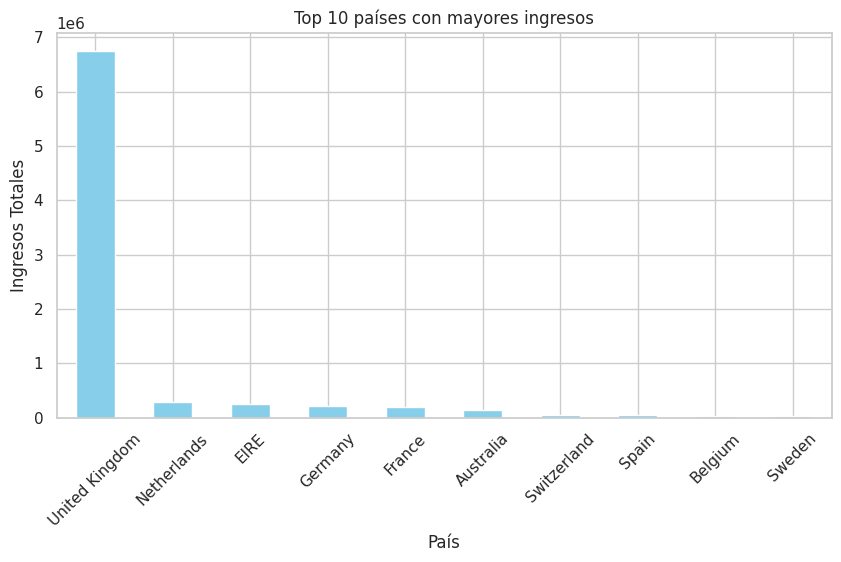

In [10]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]  # Crear una nueva columna con el total de cada venta

ventas_por_pais = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ventas_por_pais[:10].plot(kind="bar", color="skyblue")
plt.title("Top 10 países con mayores ingresos")
plt.xlabel("País")
plt.ylabel("Ingresos Totales")
plt.xticks(rotation=45)
plt.show()


📌 Tendencia de ventas a lo largo del tiempo:

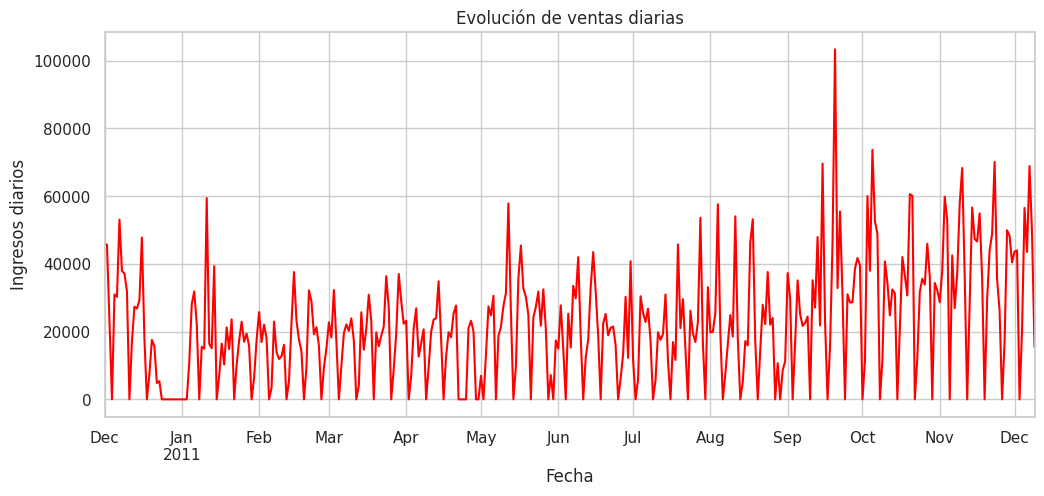

In [11]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])  # Convertir a formato fecha
df.set_index("InvoiceDate", inplace=True)  # Establecer la fecha como índice

ventas_diarias = df.resample("D")["TotalPrice"].sum()  # Agrupar por día

plt.figure(figsize=(12, 5))
ventas_diarias.plot(color="red")
plt.title("Evolución de ventas diarias")
plt.xlabel("Fecha")
plt.ylabel("Ingresos diarios")
plt.show()


# 📊 Conclusiones e Insights del Análisis

## Países con más ventas  
El **Reino Unido** lidera en número de ventas, seguido por países como **Alemania y Francia**.  
Esto sugiere que la empresa tiene una **base de clientes fuerte** en estos mercados.  

## Ingresos totales por país  
El análisis de ingresos muestra que los países con más ventas **no siempre son los que generan más ingresos**.  
Esto podría indicar diferencias en el **ticket promedio** o en las **estrategias de precios según la región**.  

## Tendencias de ventas a lo largo del tiempo  
Se identifican **picos de ventas en ciertos periodos**, probablemente relacionados con **eventos comerciales** como **Black Friday** o la **temporada navideña**.  
Esto es clave para planificar **estrategias de inventario y marketing**.  

## Clientes con más compras  
Si se analizara más a fondo la base de clientes, podríamos **segmentarlos en compradores recurrentes vs. esporádicos**, permitiendo **personalizar promociones y estrategias de fidelización**.  

## Oportunidades de optimización  
✅ **Ajuste de inventario** en base a **tendencias estacionales**.  
✅ **Segmentación de clientes** para **estrategias de marketing personalizadas**.  
✅ **Análisis de devoluciones y pedidos cancelados** para **mejorar la logística**.  
